# Merge Dataframes, Create Correlation Matrix

In [1]:
import pandas as pd
import os
import numpy as np
import nwis_pull as nwis
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib

# Download USGS Data and Save to CSV if needed

In [2]:
# start_date = '1970-01-01'

# siteid  =  '08169000'
# station_nm = 'Comal Rv at New Braunfels, TX'
# param_code = '00060'
# df = nwis.pull_data.realtime(siteid, start_date=start_date, end_date='2018-10-18', param_code=param_code)
# df['Comal River'] = df[param_code]
# del df[param_code]

# df.to_csv(os.path.join('..', 'data', 'streamflow', 'ComalRv.csv'))

# Read in csvs

In [3]:
comalRv   = pd.read_csv(os.path.join('..', "..", 'data', 'streamflow', 'ComalRv.csv'))
comalRv['Comal Rv Discharge (cfs)'] = comalRv['Comal River']
print(comalRv.head())
comalSpg = pd.read_csv(os.path.join('..', "..", 'data', 'springflow', 'ComalSpgs.csv'))
print(comalSpg.head())
comalSpg = comalSpg[['datetime', 'Springflow']]
comalRv.set_index(pd.to_datetime(comalRv['datetime']), inplace=True)
comalSpg.set_index(pd.to_datetime(comalSpg['datetime']), inplace=True)

              datetime  Comal River  Comal Rv Discharge (cfs)
0  1986-10-01 00:30:00        254.0                     254.0
1  1986-10-01 01:00:00        250.0                     250.0
2  1986-10-01 01:30:00        254.0                     254.0
3  1986-10-01 02:00:00        250.0                     250.0
4  1986-10-01 02:30:00        254.0                     254.0
  Agency  Station datetime  Springflow Code2
0   USGS  8168710   1/1/70       308.0     A
1   USGS  8168710   1/2/70       308.0     A
2   USGS  8168710   1/3/70       308.0     A
3   USGS  8168710   1/4/70       308.0     A
4   USGS  8168710   1/5/70       310.0     A


In [4]:
comalRv.head()

,datetime,Comal River,Comal Rv Discharge (cfs)
datetime,,,
1986-10-01 00:30:00,1986-10-01 00:30:00,254.0,254.0
1986-10-01 01:00:00,1986-10-01 01:00:00,250.0,250.0
1986-10-01 01:30:00,1986-10-01 01:30:00,254.0,254.0
1986-10-01 02:00:00,1986-10-01 02:00:00,250.0,250.0
1986-10-01 02:30:00,1986-10-01 02:30:00,254.0,254.0


# Read in Well Data from EAA (J17 and J27)

In [5]:
j17 = pd.read_csv(os.path.join('..', "..", 'data', "well_level", 'j17.csv'))
j17['datetime'] = pd.to_datetime(j17['pdate'])
del j17['pdate']
j17 = j17.loc[j17['datetime'] > pd.to_datetime("01/01/1970")]
j17.index = j17['datetime']
j17 = j17[['MaxLevel']]
j17['J17 (ft above msl)'] = j17[['MaxLevel']]
j17.to_csv(os.path.join("..", "..", "data", "well_level", "dailyDateRange_j17.csv"))

In [6]:
j27 = pd.read_csv(os.path.join('..', "..", 'data', "well_level", 'j27.csv'))
j27['datetime'] = pd.to_datetime(j27['pdate'])
del j27['pdate']
j27 = j27.loc[j27['datetime'] > pd.to_datetime("01/01/1970")]
j27.index = j27['datetime']
j27 = j27[['MaxLevel']]
j27['J27 (ft above msl)'] = j27[['MaxLevel']]
j27.to_csv(os.path.join("..", "..", "data", "well_level", "dailydateRange_j27.csv"))

# Merge all data

In [7]:
df_main = comalRv.merge(comalSpg, left_index=True, right_index=True)
df_main = df_main.merge(j17, right_index=True, left_index=True)
df_main = df_main.merge(j27, right_index=True, left_index=True)
df_main.head()

,datetime_x,Comal River,Comal Rv Discharge (cfs),datetime_y,Springflow,MaxLevel_x,J17 (ft above msl),MaxLevel_y,J27 (ft above msl)
datetime,,,,,,,,,
1986-10-04,1986-10-04 00:00:00,238.0,238.0,10/4/86,245.0,659.20,659.20,873.15,873.15
1986-10-05,1986-10-05 00:00:00,254.0,254.0,10/5/86,245.0,659.20,659.20,873.15,873.15
1986-10-08,1986-10-08 00:00:00,262.0,262.0,10/8/86,250.0,662.56,662.56,873.45,873.45
1986-10-14,1986-10-14 00:00:00,286.0,286.0,10/14/86,278.0,669.96,669.96,874.05,874.05
1986-10-15,1986-10-15 00:00:00,278.0,278.0,10/15/86,277.0,670.75,670.75,874.15,874.15


# Clean up the USGS and EAA data

In [8]:
df_main['Springflow (cfs)'] = df_main['Springflow']
df_main = df_main[["Comal Rv Discharge (cfs)", "Springflow (cfs)", "J17 (ft above msl)", "J27 (ft above msl)"]]
df_main.to_csv(os.path.join("..", "..", "data", "streamflow", "Springflow_All_Comal.csv"))
df_main.head()

,Comal Rv Discharge (cfs),Springflow (cfs),J17 (ft above msl),J27 (ft above msl)
datetime,,,,
1986-10-04,238.0,245.0,659.20,873.15
1986-10-05,254.0,245.0,659.20,873.15
1986-10-08,262.0,250.0,662.56,873.45
1986-10-14,286.0,278.0,669.96,874.05
1986-10-15,278.0,277.0,670.75,874.15


## Remove data outside two standard deviations

In [9]:
m = 2
print(len(df_main))
for col in df_main.columns:
    std = np.std(df_main[col])
    df_main = df_main.loc[abs(df_main[col] - np.nanmean(df_main[col])) < m * std]
print(len(df_main))

9635
9568


## Calculate correlations between all inputs

In [10]:
corr = df_main.corr()
corr.to_csv(os.path.join("..", "..", "data", "streamflow", "output", "CorrMatrix.csv"))
print(corr)

                          Comal Rv Discharge (cfs)  Springflow (cfs)  \
Comal Rv Discharge (cfs)                  1.000000          0.962584   
Springflow (cfs)                          0.962584          1.000000   
J17 (ft above msl)                        0.936234          0.974499   
J27 (ft above msl)                        0.701768          0.742798   

                          J17 (ft above msl)  J27 (ft above msl)  
Comal Rv Discharge (cfs)            0.936234            0.701768  
Springflow (cfs)                    0.974499            0.742798  
J17 (ft above msl)                  1.000000            0.742803  
J27 (ft above msl)                  0.742803            1.000000  


In [11]:
corr1 = ["Comal River",  "Comal Springflow", "MaxLevel_J17", "MaxLevel_J27"]
corr2 = ["Comal River",  "Comal Springflow", "MaxLevel_J17", "MaxLevel_J27"]

In [12]:
corr_array = np.array(df_main.corr())
corr_array

array([[1.        , 0.96258377, 0.93623407, 0.70176805],
       [0.96258377, 1.        , 0.97449857, 0.74279825],
       [0.93623407, 0.97449857, 1.        , 0.74280284],
       [0.70176805, 0.74279825, 0.74280284, 1.        ]])

## Plot Correlation Matrix

/Users/emilypease/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


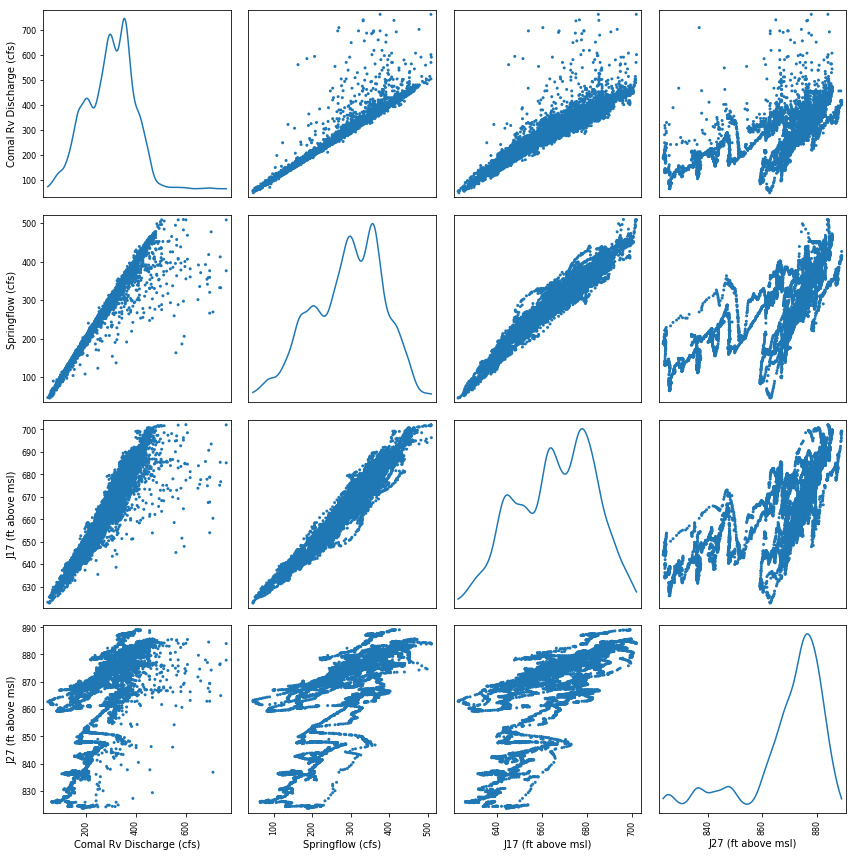

In [14]:
fig, ax = plt.subplots(figsize=(12, 12))
scatter_matrix(df_main, alpha=1, diagonal='kde', ax=ax)

fig.tight_layout()
fig.savefig(os.path.join('..', "..", 'img', 'corr_plt_alpha1.png'))